# Run  crt_fill_parameters

#### This notebook processes the grid scale DEM for generating cascades. 

#### The crt_fill_parameters.py script runs the Cascade Routing tool (https://water.usgs.gov/ogw/CRT/) with no designated streams, because CRT will not fill cells that contain streams. By excluding streams, cells containing streams will be filled if they are undeclared swales. CRT fills swales for cells to create downward sloping paths from every cell inside the watershed boundary. Swales are HRUs/cells that are surrounded in all 4 or 8 directions by cells of higher elevation. Streams and stream cells must slope downard in the direction of flow. Non-stream cells can be designated as swales, but caution should be used as no lateral flow can occur out of a swale. Note that there cannot be designated swales for PRMS groundwater flow reservoirs (GWRs).

In [2]:
%matplotlib inline
import sys, os
import matplotlib.pyplot as plt
import arcpy
import geopandas
import matplotlib.image as mpimg
import ConfigParser
from matplotlib import cm
from arcpy import env
python_exe = sys.executable

In [2]:
# Set folder locations
arc_gsflow_folder=r"..\scripts"
config_file_folder=r"..\examples\sagehen"

#### GsflowArcpy uses a configuration file to set variables required by the scripts. Below the configuration file template is read, and default values are changed and written to the configuration file (".INI") read by GsflowArcpy.

In [3]:
# Load GsflowArcpy configuration file
Config = ConfigParser.ConfigParser()
Config.read("..\examples\sagehen\sagehen_parameters_orig.ini")

['..\\examples\\sagehen\\sagehen_parameters_orig.ini']

#### Values set below are required for running the fill procedure using CRT. Note the crt_fill_flag is set to True. This will automatically apply CRT fill values to the DEM_ADJ.

In [4]:
# Set problem specific variable values for scripts
crt_exe_path = "..\..\bin\CRT_1.3.1.exe"
crt_hruflg = 0
crt_flowflg = 3
crt_dpit = 0.01
crt_outitmax = 100000
use_crt_fill_flag = True

In [5]:
# Write out modified values to configuration file
cfgfile = open("..\examples\sagehen\sagehen_parameters.ini",'w')
Config.set('INPUTS','crt_exe_path',crt_exe_path)
Config.set('INPUTS','crt_hruflg',crt_hruflg)
Config.set('INPUTS','crt_flowflg',crt_flowflg)
Config.set('INPUTS','crt_dpit',crt_dpit)
Config.set('INPUTS','crt_outitmax',crt_outitmax)
Config.set('INPUTS','use_crt_fill_flag',use_crt_fill_flag)
Config.write(cfgfile)
cfgfile.close()

#### Run the GsflowArpcy script crt_fill_parameters.

In [6]:
# Set and run crt_fill_parameters script
script = r"crt_fill_parameters.py"
argument = r" -i ..\examples\sagehen\sagehen_parameters.ini"
cmd=python_exe + " " + os.path.join(arc_gsflow_folder,script)
cmd = cmd + argument
os.system(cmd)

0

#### After running the crt_fill_parameters script we can visualize fill values. Run the next block of code to observe the CRT fill array

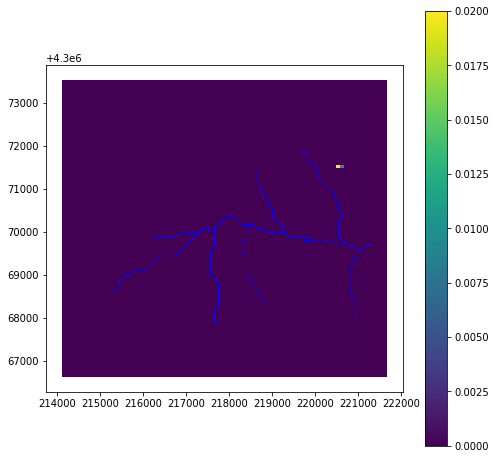

In [4]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
fn1=r"..\examples\sagehen\shapefiles\watershed_proj.shp"
fn2=r"..\examples\sagehen\hru_params\flow_rasters\streams.shp"
fn3=r"..\examples\sagehen\hru_params\hru_params.shp"
boundary=geopandas.read_file(fn1)
streams=geopandas.read_file(fn2)
hru_params=geopandas.read_file(fn3)
plt.rcParams["figure.figsize"] = (8,8)
streams.plot(ax=ax,color='none', edgecolor='blue', linewidth=1.0)
boundary.plot(ax=ax,color='none', edgecolor='black', linewidth=1.0)
hru_params.plot(column="CRT_FILL",ax=ax,legend=True)
plt.show()